# Compare the IW amplitude with temperature perturbations at a fixed depth

In [2]:
import mycurrents.oceanmooring as om

from soda.utils.timeseries import timeseries
from soda.utils import harmonic_analysis
from soda.utils.othertime import datetime64todatetime, datetimetodatetime64

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import pandas as pd

In [3]:
%matplotlib notebook

In [5]:
# Temperature file
Tfile = '/home/suntans/Share/ARCHub/DATA/FIELD/ShellCrux/KP150_Gridded_Mooring_TP_linear.nc'

sites = ['KP150_phs1', 'KP150_phs2']

# IW amplitude file
Afile = '/home/suntans/Share/ARCHub/DATA/FIELD/ShellCrux/KP150_Fitted_Buoyancy_wout_motion_unvenfilt.nc'


In [28]:
varname = 'watertemp'

# Load the temperature data
T = om.from_netcdf(Tfile, varname, group=sites[1])



In [29]:
# Extract the data at a depth of interest --> convert to an OceanMooring object
T140 = om.OceanMooring(T.t, T.interp_z(140),np.array([140]) )

# Low-pass filter the data
T140_low = om.OceanMooring(T.t, T140.filt(34*3600),np.array([140]) )

T140_high = om.OceanMooring(T.t, T140.y - T140_low.y, np.array([140]) )


/home/suntans/.conda/envs/soda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


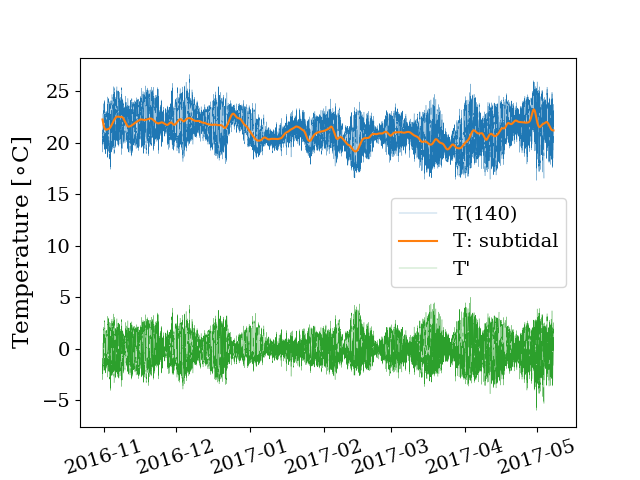

In [69]:

plt.figure()
T140.plot(lw=0.2)
T140_low.plot()
T140_high.plot(lw=0.2)
plt.ylabel('Temperature [$\circ$C]')
plt.legend(('T(140)', 'T: subtidal','T\''))
plt.savefig('../../FIGURES/KP150_140m_Temp.png',dpi=150)

In [42]:
# Extract the mode amplitude
ds = xr.open_dataset(Afile, group=sites[1])
ds

<xarray.Dataset>
Dimensions:   (freqs: 3, modes: 4, time: 271889, timeslow: 756, z: 100)
Coordinates:
  * modes     (modes) int64 0 1 2 3
  * time      (time) datetime64[ns] 2016-10-31T06:40:00 ... 2017-05-08T02:08:00
  * z         (z) float64 0.0 -2.525 -5.051 -7.576 ... -244.9 -247.5 -250.0
  * timeslow  (timeslow) datetime64[ns] 2016-10-31T06:40:00 ... 2017-05-08T00:40:00
  * freqs     (freqs) float64 0.0001405 0.000281 0.0004216
Data variables:
    Atide     (time, modes) float64 ...
    phi       (timeslow, modes, z) float64 ...
    rhofit    (time, z) float64 ...
    r10       (timeslow, modes) float64 ...
    rhobar    (timeslow, z) float64 ...
    amp       (timeslow, modes, freqs) float64 ...
    phs       (timeslow, modes, freqs) float64 ...
    A_n       (time, modes) float64 ...
    N2        (timeslow, z) float64 ...
    cn        (timeslow, modes) float64 ...
Attributes:
    Y:            -13.75897
    ncfile:       /home/suntans/Share/ARCHub/DATA/FIELD/ShellCrux/KP150_Gr

In [43]:
# Interpolate the T data onto the amplitude time step
t,y = T140_high.interp(ds.time.values, method='nearest')
T140_high_i = om.OceanMooring(t,y,np.array([140]) )

<IPython.core.display.Javascript object>


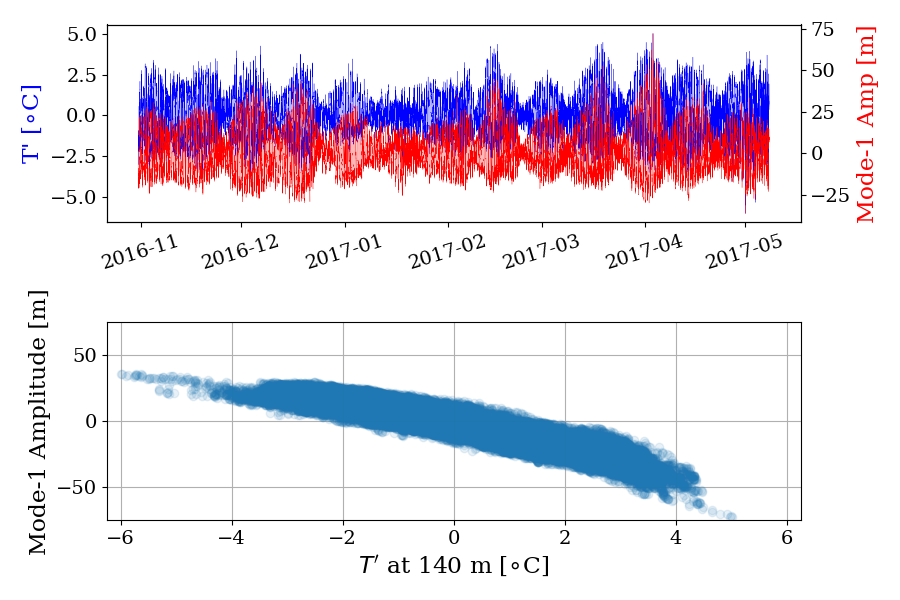

In [80]:
plt.figure(figsize=(9,6))
plt.subplot2grid((2,1),(0,0),colspan=1)
T140_high_i.plot(color='b',lw=0.2)
plt.ylabel('T\' [$\circ$C]', color='b')
ax2=plt.twinx()
ax2.plot(t, -ds.A_n[:,0],'r',lw=0.2)
plt.ylabel('Mode-1 Amp [m]', color='r')

plt.subplot2grid((2,1),(1,0),colspan=1)

plt.plot(T140_high_i.y, ds.A_n[:,0],'o',alpha=0.1)
plt.xlim(-6.25,6.25)
plt.ylim(-75,75)
plt.grid(b=True)
plt.ylabel('Mode-1 Amplitude [m]')
plt.xlabel('$T\'$ at 140 m [$\circ$C]')
plt.tight_layout()

plt.savefig('../../FIGURES/KP150_140m_Tpr_vs_Amp.png',dpi=150)

<IPython.core.display.Javascript object>


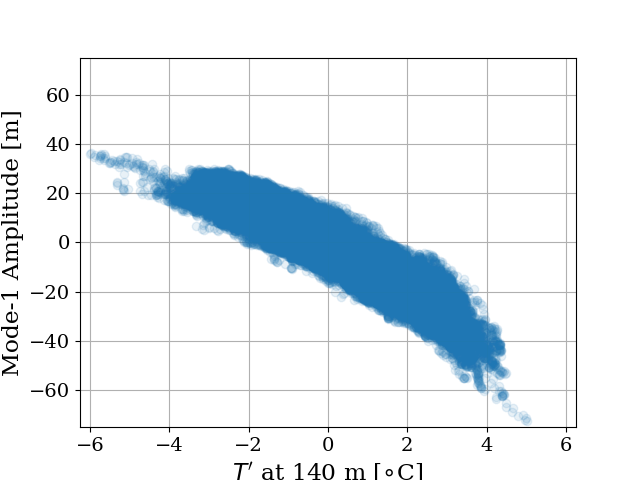

Text(0.5, 0, "$T'$ at 140 m [$\\circ$C]")

In [54]:
plt.figure()
plt.plot(T140_high_i.y, ds.A_n[:,0],'o',alpha=0.1)
plt.xlim(-6.25,6.25)
plt.ylim(-75,75)
plt.grid(b=True)
plt.ylabel('Mode-1 Amplitude [m]')
plt.xlabel('$T\'$ at 140 m [$\circ$C]')

#plt.plot(T140_high_i.y, ds.A_n[:,1],'r.')

/home/suntans/.conda/envs/soda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


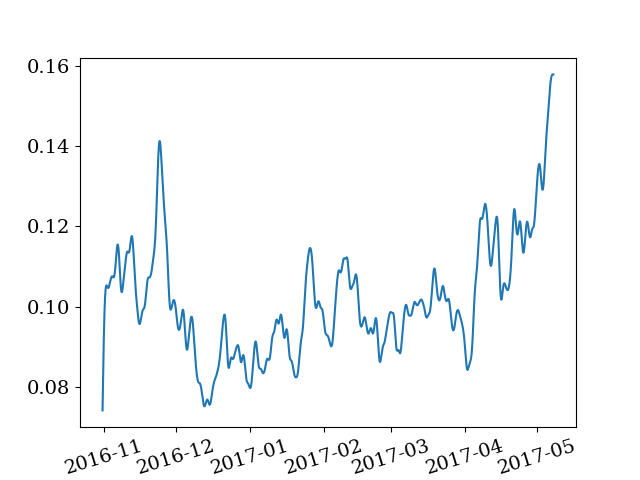

In [56]:
# Estimate dT/dz by using the temperature 10 m above
# Extract the data at a depth of interest --> convert to an OceanMooring object
T130 = om.OceanMooring(T.t, T.interp_z(130),np.array([130]) )

# Low-pass filter the data
T130_low = om.OceanMooring(T.t, T130.filt(34*3600),np.array([130]) )

# Calculate the gradient
dz = 10
dT_dz = om.OceanMooring(T.t, (T130_low.y - T140_low.y)/dz,np.array([130]) )

plt.figure()
dT_dz.plot()

In [57]:
# Calcaulte the isotherm displace
eta_140  = om.OceanMooring(T.t, -T140_high.y / dT_dz.y,np.array([140]) )

# Interpolate the T data onto the amplitude time step
t,y = eta_140.interp(ds.time.values, method='nearest')
eta_140_i = om.OceanMooring(t,y,np.array([140]) )

<IPython.core.display.Javascript object>


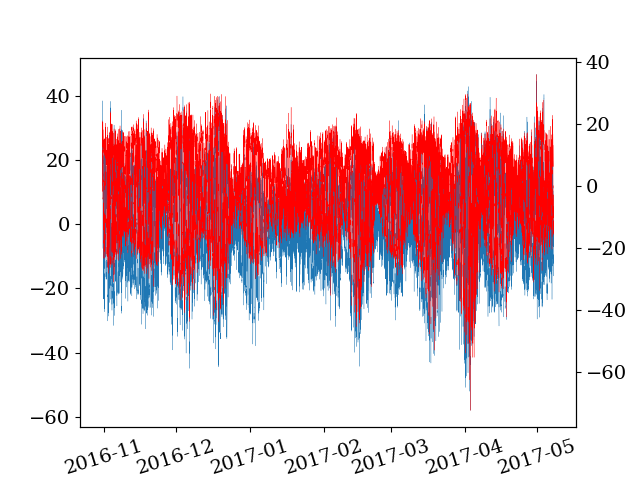

In [58]:
plt.figure()
eta_140_i.plot(lw=0.2)
ax2=plt.twinx()
ax2.plot(t, ds.A_n[:,0],'r',lw=0.2)

<IPython.core.display.Javascript object>


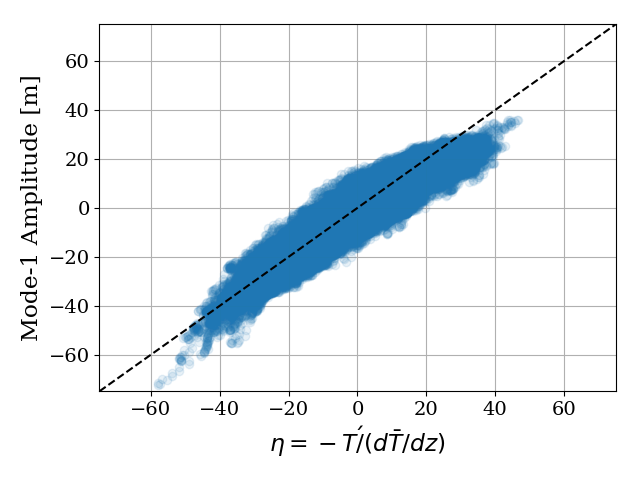

In [81]:
plt.figure()
plt.plot(eta_140_i.y, ds.A_n[:,0],'o',alpha=0.1)
plt.plot([-75,75],[-75,75],'k--')
plt.xlim(-75,75)
plt.ylim(-75,75)
plt.grid(b=True)
plt.ylabel('Mode-1 Amplitude [m]')
plt.xlabel(r'$\eta=-T\'/(d \bar{T}/dz)$')
plt.tight_layout()
plt.savefig('../../FIGURES/KP150_140m_eta_vs_Amp.png',dpi=150)